# Test of the glmt class   
Aug. 2025

In [1]:
import os
print(os.getcwd())  # Verify it’s now ./PyScatter
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(os.getcwd())  # Verify it’s now .../PyScatter

/Users/joakimpugesgaardsandberg/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DTU/5. år/Student Assistant-Nanomade/Scripts/Git/MieScat/examples
/Users/joakimpugesgaardsandberg/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DTU/5. år/Student Assistant-Nanomade/Scripts/Git/MieScat


## Description

The glmt (Generalized Lorentz-Mie Theory) class implements the results of the scattering problem concerning a homogenous sphere and an electromagnetic field. It is used as a tool for the interaction module, in which the Mie coefficients for a specific scattering problem are obtained from a glmt object. It is therefore not often that a user will need to use the glmt module on its own. This notebook, however, demonstrates how it is used by the interaction module.

## Initialization

The Mie coefficients contain information about the incident field as well as the scatterer. The necessary inputs are therefore the wavelength of the field, the relative refractive index of the scatterer (to the medium outside). For practical reasons, it also takes the so-called size parameter $x=2\pi R/\lambda$ as input, where $R$ is the radius of the scatterer.    
The permeabilities of the particle ($\mu$) and the medium ($\mu_1$) can also be changed, but are set to 1 by default. 
Finally, the maximum multipolar order also needs to be defined.

In [2]:
from src.glmt import *

In [3]:

#relative refractive index
nr = 1.5
wl = 0.632 #microns
R = 0.075 #microns
x = 2 * np.pi * R / wl  # size parameter, x = 2πR/λ

# maximum order
maxJ = 25

mie = glmt(maxJ , wl, nr, x)

From the glmt object, the mie coefficients can now be extracted using their respective methods. Since we only have one set of parameters, each method produces an array of dimension $(\text{maxJ}+1)$, corresponding to multipolar orders $j=0\cdots 25$.

In [4]:
a = mie.a_j()
b = mie.b_j()
c = mie.c_j()
d = mie.d_j()

print("Shape of a:", np.shape(a))

Shape of a: (26,)


The Mie coefficients can now be plotted as shown below:

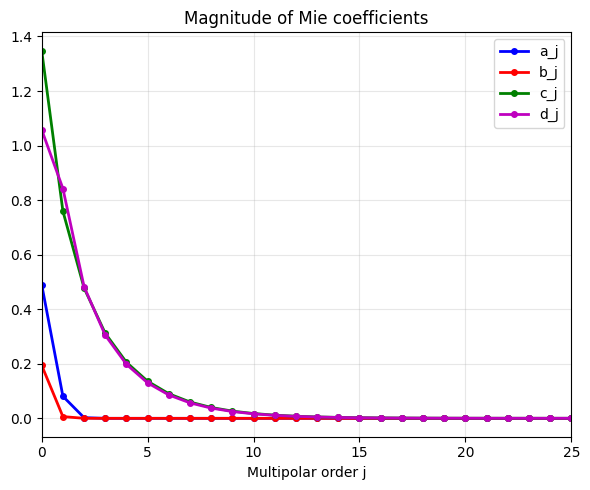

In [5]:
import matplotlib.pyplot as plt

# Plot Mie coefficients
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))

# Plot magnitude
ax1.plot(range(len(a)), np.abs(a), 'bo-', linewidth=2, markersize=4, label='a_j')
ax1.plot(range(len(b)), np.abs(b), 'ro-', linewidth=2, markersize=4, label='b_j')
ax1.plot(range(len(c)), np.abs(c), 'go-', linewidth=2, markersize=4, label='c_j')
ax1.plot(range(len(d)), np.abs(d), 'mo-', linewidth=2, markersize=4, label='d_j')
ax1.set_xlabel('Multipolar order j')
ax1.set_title('Magnitude of Mie coefficients')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, maxJ)
ax1.legend(loc='best')
plt.tight_layout()
plt.show()

## Parametric studies

More often, we are interested in analyzing the Mie coefficients for a varying refractive index or size parameter. This is possible by defining a glmt object using numpy arrays of the desired parameters.    Below, I demonstrate the replication of Fig. 4.7 in X. Zambrana-Puyalto,arXiv:1502.01648 [physics.optics]

In [6]:
#relative refractive index
nr = 1.5
wl = 0.632 #microns

# size parameter
x = np.linspace(0.01, 20, 1000)

# maximum order
maxJ = 20

mie = glmt(maxJ , wl, nr, x)
a = mie.a_j()
print("shape", a.shape)

shape (21, 1000)


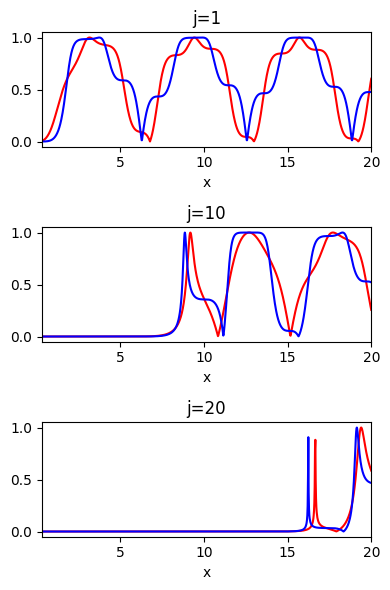

In [7]:
#plot 4 coefficients for j=0-4
j = np.array([1,10,20])
fig, ax = plt.subplots(3,1, figsize=(4,6))
ax[0].set(title=r"j=1", xlabel="x")
ax[1].set(title=r"j=10", xlabel="x")
ax[2].set(title=r"j=20", xlabel="x")
a = mie.a_j()
b = mie.b_j()

for i in range(3):
    ax[i].plot(x, np.abs(a[j[i]]), label='a', color = "red")
    ax[i].plot(x, np.abs(b[j[i]]), label='b', color = "blue")
    ax[i].set_xlim(0.3, x.max())
fig.tight_layout()
plt.show()

## More dimensions

The objects can be defined with up to two varying arrays:

In [8]:
#relative refractive index
nr = np.linspace(1.5, 4.5, 200)
wl = 0.8 #microns

# size parameter
x = np.linspace(0.01, 20, 200)

# maximum order
maxJ = 5

mie = glmt(maxJ , wl, nr, x)
a = mie.a_j()
print("shape", a.shape)

shape (6, 200, 200)


Visualizing this in a two-dimensional parameter space can aid in the search of specific resonanses.

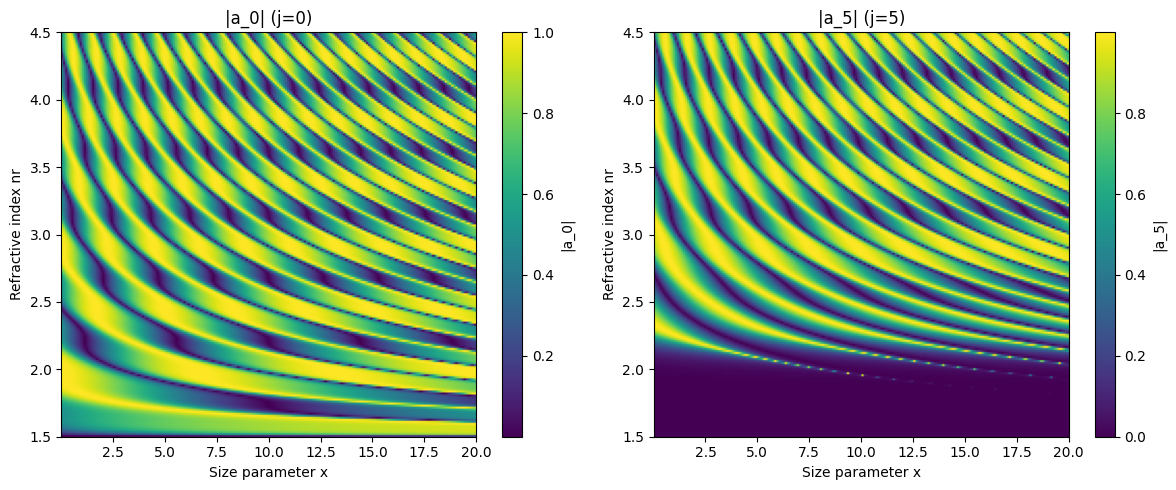

In [9]:
# Plot 2D images of abs(a) for first and last elements in first dimension
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First element (j=0)
im1 = ax1.imshow(np.abs(a[0]), extent=[x.min(), x.max(), nr.min(), nr.max()], 
                 aspect='auto', origin='lower', cmap='viridis')
ax1.set_xlabel('Size parameter x')
ax1.set_ylabel('Refractive index nr')
ax1.set_title('|a_0| (j=0)')
plt.colorbar(im1, ax=ax1, label='|a_0|')

# Last element (j=maxJ)
im2 = ax2.imshow(np.abs(a[-1]), extent=[x.min(), x.max(), nr.min(), nr.max()], 
                 aspect='auto', origin='lower', cmap='viridis')
ax2.set_xlabel('Size parameter x')
ax2.set_ylabel('Refractive index nr')
ax2.set_title(f'|a_{maxJ}| (j={maxJ})')
plt.colorbar(im2, ax=ax2, label=f'|a_{maxJ}|')

plt.tight_layout()
plt.show()

Finally, for plotting the Mie coefficients of certain materials, the wavelength and refractive index can be coupled, using the 'dim' argument. By inputting two 1D arrays and using "dim=1", a 1D-object is created. Note that both the wavelength and size parameter need to be of the same length. 

In [10]:
#relative refractive index
nr = np.linspace(1.5, 2, 500)

# wavelength
wl = np.linspace(0.1, 1.2, 500)

# radius 
R = 0.5 # µm

# size parameter
x = 2 * np.pi * R / wl

# maximum order
maxJ = 5

mie = glmt(maxJ , wl, nr, x, dim = 1)
a = mie.a_j()
b = mie.b_j()
c = mie.c_j()
d = mie.d_j()
print("shape", a.shape)

shape (6, 500)


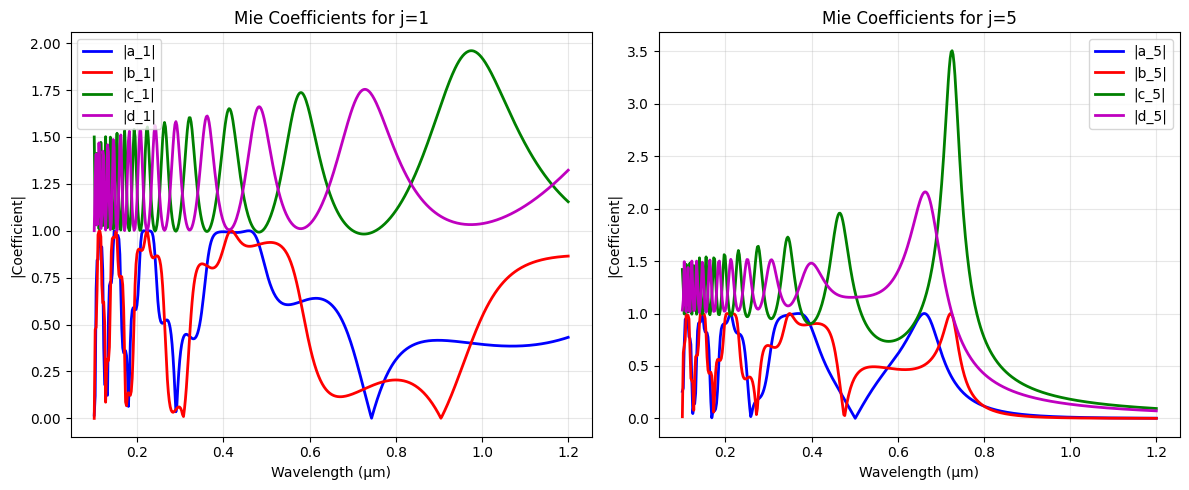

In [11]:
# Plot all four coefficients for j=1 and j=5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# j=1 (index 1)
ax1.plot(wl, np.abs(a[1]), 'b-', linewidth=2, label='|a_1|')
ax1.plot(wl, np.abs(b[1]), 'r-', linewidth=2, label='|b_1|')
ax1.plot(wl, np.abs(c[1]), 'g-', linewidth=2, label='|c_1|')
ax1.plot(wl, np.abs(d[1]), 'm-', linewidth=2, label='|d_1|')
ax1.set_xlabel('Wavelength (µm)')
ax1.set_ylabel('|Coefficient|')
ax1.set_title('Mie Coefficients for j=1')
ax1.legend()
ax1.grid(True, alpha=0.3)

# j=5 (index 5)
ax2.plot(wl, np.abs(a[5]), 'b-', linewidth=2, label='|a_5|')
ax2.plot(wl, np.abs(b[5]), 'r-', linewidth=2, label='|b_5|')
ax2.plot(wl, np.abs(c[5]), 'g-', linewidth=2, label='|c_5|')
ax2.plot(wl, np.abs(d[5]), 'm-', linewidth=2, label='|d_5|')
ax2.set_xlabel('Wavelength (µm)')
ax2.set_ylabel('|Coefficient|')
ax2.set_title('Mie Coefficients for j=5')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()